# **Mall Customers Analysis using ML**

## EDA

Firstly, we import all of the modules needed such as `pandas`, `numpy`, `seaborn`, and `matplotlib.pyplot`.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Next, we import the CSV files to the colab.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


After importing, we open the CSV dataset with the customer ID as the index.

In [ ]:
customers = pd.read_csv("Mall_Customers.csv",index_col=0)
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


We can start checking the dataset whether we have any empty data by using `isnull().sum()`.

In [ ]:
customers.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Turns out there is no any empty data so we do not have to do any further methods to eliminate the empty data. Then, we want to check the general data description.

In [ ]:
customers.describe().round()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0
mean,39.0,61.0,50.0
std,14.0,26.0,26.0
min,18.0,15.0,1.0
25%,29.0,42.0,35.0
50%,36.0,62.0,50.0
75%,49.0,78.0,73.0
max,70.0,137.0,99.0


The dataset describes that we have 200 data. The main information are the average of 39 for Age, 61 for annual income, and 50 for spending score.

Then, we want to see relationships of each columns. Starting from the relationship between annual income based on age and gender.

In [ ]:
income_agen = customers.pivot_table("Annual Income (k$)", index="Age", columns="Gender", aggfunc="mean")
income_agen.head()

Gender,Female,Male
Age,,
18,65.00,46.666667
19,64.00,54.666667
20,26.50,51.666667
21,44.75,15.000000
22,37.00,20.000000


In [ ]:
income_agen.sum().round()

Gender
Female    2587.0
Male      2604.0
dtype: float64

We can see that gender with most income is Male compared to femaleafter calculated.


After that, we want to see the relationships between spending score based on age and gender.

In [ ]:
spending_agen = customers.pivot_table("Spending Score (1-100)", index="Age", columns="Gender", aggfunc="mean")
spending_agen.head()

Gender,Female,Male
Age,,
18,48.00,64.000000
19,52.00,35.666667
20,40.50,40.000000
21,63.25,81.000000
22,65.50,79.000000


In [ ]:
spending_agen.sum().round()

Gender
Female    1985.0
Male      2071.0
dtype: float64

Then, we want to see the gender with most spending. The result is similar to the income one, Male spends more than Female after summed.

Since the data is too general, we shall segment the customers' age and gender, spending score and annual income more specifically by using ranges. Starting with customers ages 18 to 25.

In [ ]:
age1 = customers.loc[(customers['Age'] >= 18) & (customers['Age'] <= 25)]

<Axes: xlabel='Age,Gender'>

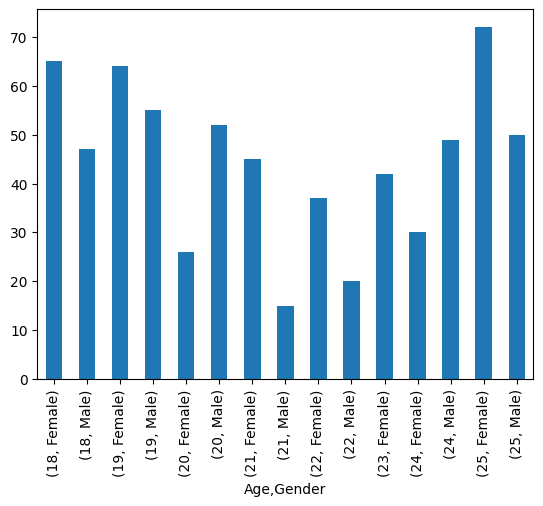

In [ ]:
agen_income1 = age1.groupby(['Age','Gender'])['Annual Income (k$)'].mean().round()
agen_income1.plot(kind = 'bar')

Here, it says that customer who are 25 year-old females has the highest income among others while 21 year-old males has the lowest income per year.

Let us compare with the spending of these youth.

<Axes: xlabel='Age,Gender'>

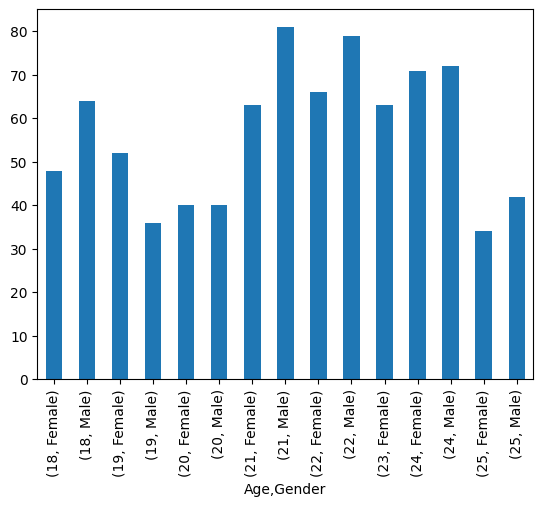

In [ ]:
agen_spending1 = age1.groupby(['Age','Gender'])['Spending Score (1-100)'].mean().round()
agen_spending1.plot(kind = 'bar')

The result is shows exactly the opposite. Even though 21 year-old males has the lowest income. It is the highest among all with the score of 80. Meanwhile, 25 year-old females got the lowest in spending.

Now, we get into customers ages 26 to 39.

In [ ]:
age2 = customers.loc[(customers['Age'] >= 26) & (customers['Age'] <= 39)]

<Axes: xlabel='Age,Gender'>

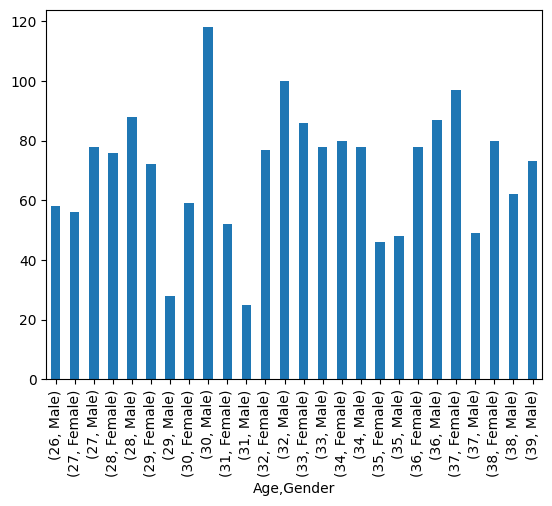

In [ ]:
agen_income2 = age2.groupby(['Age','Gender'])['Annual Income (k$)'].mean().round()
agen_income2.plot(kind = 'bar')

The result shows that the highest income is held by 30 year-old males with the score of almost touching 120k $ while the lowest income is held by 31 year-old males with the income score around 20k $.

Now, we compare them with the spending.

<Axes: xlabel='Age,Gender'>

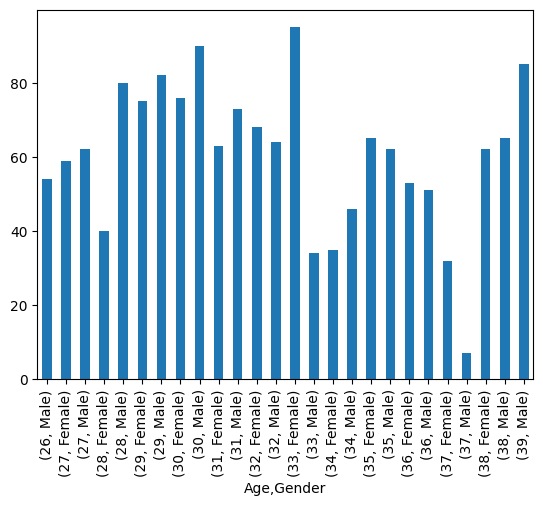

In [ ]:
agen_spending2 = age2.groupby(['Age','Gender'])['Spending Score (1-100)'].mean().round()
agen_spending2.plot(kind = 'bar')

Turns out the highest spending is held by customers who are 33 year-old females with spending score of almost touching 100 and the lowest by 37 year-old males with 1 digit score.

We move on to customers ages 40 to 55.

In [ ]:
age3 = customers.loc[(customers['Age'] >= 40) & (customers['Age'] <= 55)]

<Axes: xlabel='Age,Gender'>

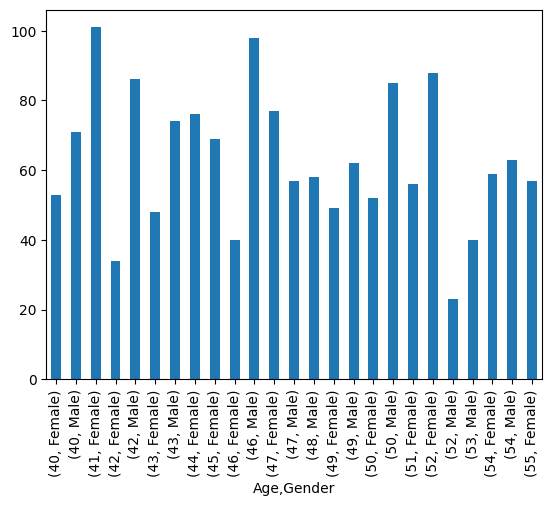

In [ ]:
agen_income3 = age3.groupby(['Age','Gender'])['Annual Income (k$)'].mean().round()
agen_income3.plot(kind = 'bar')

41 year-old females is shown to have the highest income of slightly over 100k $ and 52 year-old males is shown to have the lowest of slightly above 20k $.

We now compare them to the spending.

<Axes: xlabel='Age,Gender'>

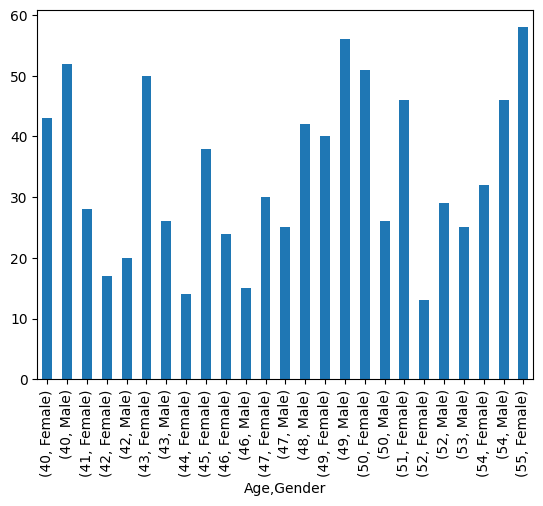

In [ ]:
agen_spending3 = age3.groupby(['Age','Gender'])['Spending Score (1-100)'].mean().round()
agen_spending3.plot(kind = 'bar')

We can see that the the ones who spend the most are 55 year-old females with the score almost reaching 60 while the ones who spend the least are 52 year-old females with the score above 10 competing with 44 year-old females with similar score.

Now, the last one, customer ages 56 to 70.

In [ ]:
age4 = customers.loc[(customers['Age'] >= 56) & (customers['Age'] <= 70)]

<Axes: xlabel='Age,Gender'>

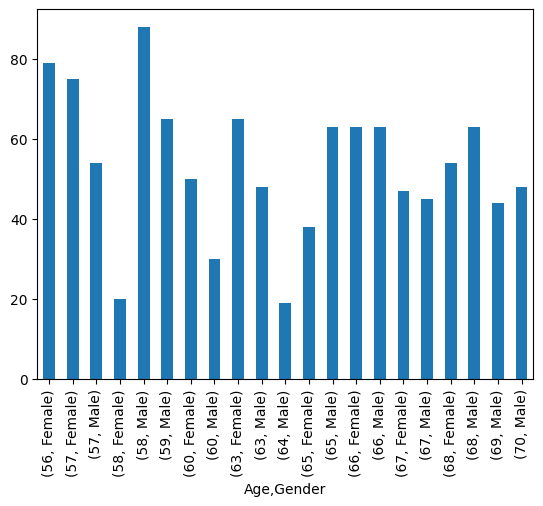

In [ ]:
agen_income4 = age4.groupby(['Age','Gender'])['Annual Income (k$)'].mean().round()
agen_income4.plot(kind = 'bar')

The result displays 58 year-old males as customer to have most income with the income almost reaching a hundred thousand dollar and 64 year-old males as customer who has the least with the score similar to 58 year-old males which are around 20k $.

Now, we compare them with spending.

<Axes: xlabel='Age,Gender'>

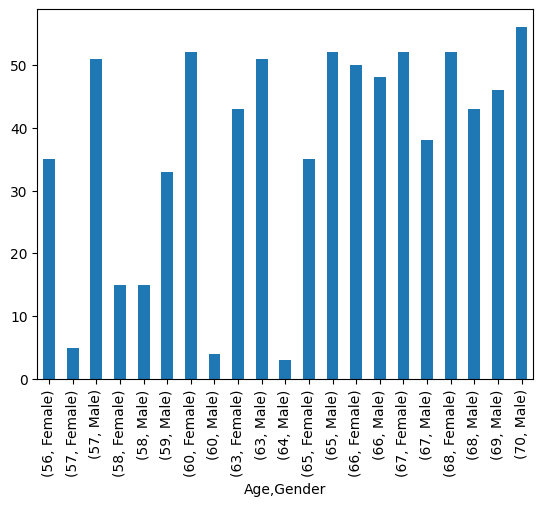

In [ ]:
agen_spending4 = age4.groupby(['Age','Gender'])['Spending Score (1-100)'].mean().round()
agen_spending4.plot(kind = 'bar')

Turns out the customer who spend the most are 70 year-old males with the score reaching almost 60 and the least are 64 year-old males with the score of 1 digit, similar to 60 year-old males and 57 year-old females.

That is all for the age and gender comparison with the annual income also with the spending. Now, we compare the annual income with spending score.

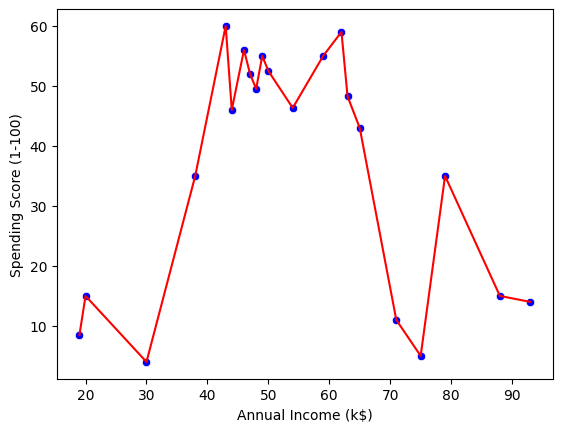

In [ ]:
mean_scores = age4.groupby("Annual Income (k$)")["Spending Score (1-100)"].mean().reset_index()

# Create a scatter plot
sns.scatterplot(data=mean_scores, x="Annual Income (k$)", y="Spending Score (1-100)", color="blue")

# Connect the means with a line
sns.lineplot(data=mean_scores, x="Annual Income (k$)", y="Spending Score (1-100)", color="red")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Based on the scatter and line plot, The ones with the annual income of 40k $ spend the highest with the score of 60. Meanwhile the ones who has annual income of 30k $ and income range around 70k $ and 80k $ spend the lowest with the score below 10.

## K-means clustering algorithm

Done with the EDA part, it is time to implement the algorithm for customer segmentation. The algorithm used is K-means clustering. K-means clustering is a specific algorithm designed for unsupervised clustering tasks. It proposes simplicity in understanding and implementing, works well with numerical data, is efficient and scalable, and easier to interperet, as well as speed in producing results.


We start the clustering based on annual income first.

### Annual and Spending

We firstly import the KMeans algorithm. Then, we define the data with values from Annual income and spending score since we want to cluster them from annual income adn spending score. Then, we initialize the wcss(Within-Cluster Sum of Squares) for different values of k. Under the `wcss`, we put an iteration for values of k from 1 to 10. k in here represents the number of clusters we want to create. We initialize the k-means thereafter, so
for each value of K, a new K-means clustering model (kmeans) is created. `n_clusters=i` specifies the current value of K, `init="k-means++"` indicates that the initialization of cluster centroids should be done in a smart way to speed up convergence, and `random_state=0` ensures reproducibility. Next, the k-means model is fitted on the data we want to cluster to calculate the clusters and assigns data points to those clusters. After fitting the model, the code calculates the WCSS for that specific K. The calculated WCSS value for the current K is appended to the wcss list.

Now, it is time to plot the Elbow curve. After the loop finishes, you have a list of WCSS values for different K values. The code then proceeds to create a plot to visualize the Elbow Curve. The x-axis represents different values of K, and the y-axis represents the corresponding WCSS values. It is a curve that helps us determine the optimal K value. We look for the "elbow point" on the plot, where the rate of decrease in WCSS starts to slow down. This is typically the optimal K value because it represents a good trade-off between the number of clusters and the quality of clustering. After that, the code sets up the plot, including the figure size, grid lines, line style, color, and markers for the data points. It also labels the axes appropriately. Finally, the `plt.show()` function is called to display the Elbow Curve plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

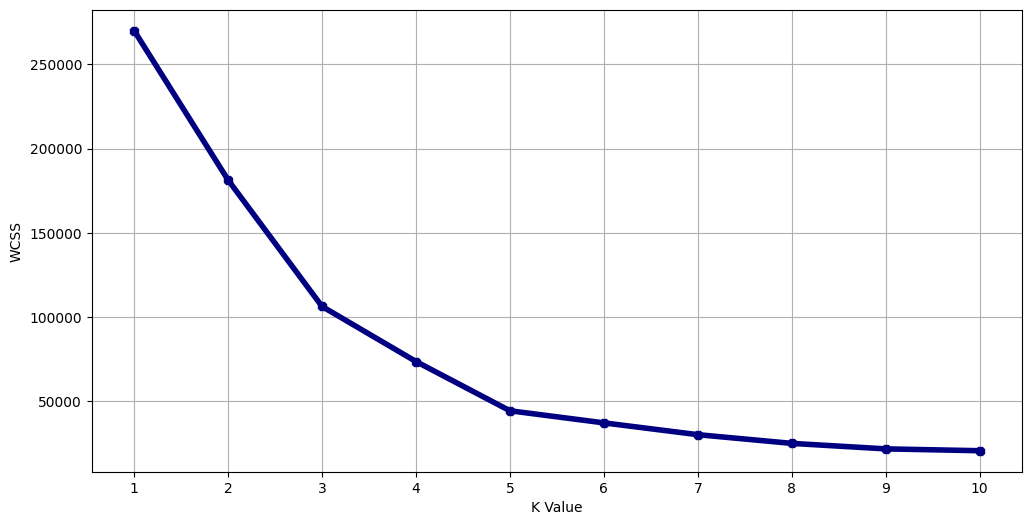

In [ ]:
from sklearn.cluster import KMeans

data = customers[["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=4, color="navy", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

From the plot, the elbow point touches the number 5. So, we create the K-means with 5 clusters. Next, we initialize the clusters with `km.fit_predict` which fits the K-means model to the data where customers.`iloc[:, 1:]` represents all the features (columns) in the customers DataFrame except the first one. It computes the clusters and assigns each customer to one of the five clusters. The resulting cluster assignments are stored in the clusters variable. Each customer is now associated with a cluster label, which indicates which cluster they belong to. Adding Cluster Labels to `DataFrame: customers["label"] = clusters` adds a new column named "label" to the customers DataFrame and populates it with the cluster labels obtained from the K-means clustering. Now, each row in the DataFrame contains information about the customer's features as well as the cluster they belong to, which is stored in the "label" column.

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(customers.iloc[:,1:])
customers["label"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now, it is time to set up the figure and subplot. We set the figure size of plot to 10 times 6, the ax defines as adding a subplot to the figure, where 111 indicates a single subplot in a grid of 1 row and 1 column.
As for the scatters for each clusters, we use `ax.scatter()` to create scatter plots of customer data points based on their cluster labels.
Each `ax.scatter()` line is responsible for plotting one cluster. It selects customers from the customers DataFrame based on their cluster label (e.g., `customers.label == 0 `selects customers in cluster 0) and assigns them a color (e.g., 'red', 'orange', etc.) and marker size `(s=60)`.

After plotting customer data points for each cluster, the code calculates and plots the centroids of these clusters. It iterates through the unique cluster labels using unique_labels, which were obtained from the 'label' column in the DataFrame. For each cluster, it calculates the mean of the `'Annual Income (k$)'` and '`Spending Score (1-100)`' for the customers in that cluster. These mean values represent the coordinates of the centroid.` ax.scatter(centroid_x, centroid_y, s=400, c='purple', label=f'Centroid {label}')` plots the centroid as a purple point with a larger marker size`(s=400)` and includes a label indicating the centroid's cluster label.

Then, we set the label x-axis for annual income and y-axis for spending score, and eventually we display them.


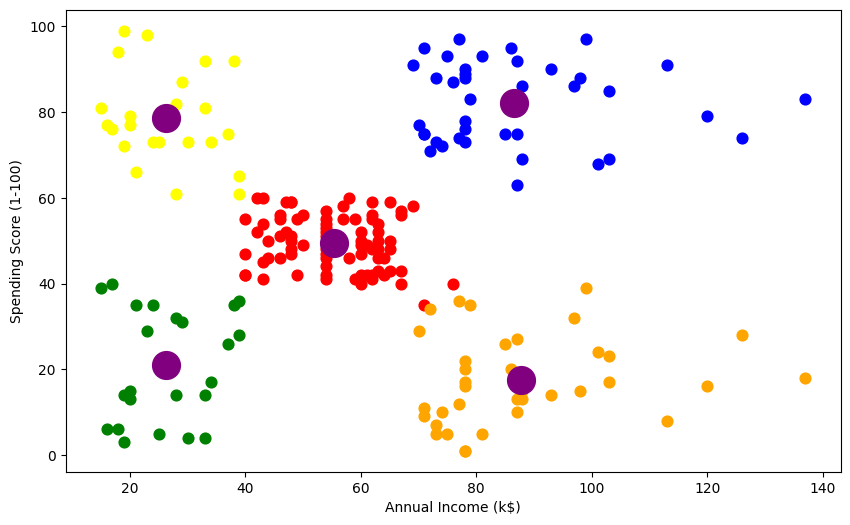

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(customers["Annual Income (k$)"][customers.label == 0], customers["Spending Score (1-100)"][customers.label == 0], c='red', s=60)
ax.scatter(customers["Annual Income (k$)"][customers.label == 1], customers["Spending Score (1-100)"][customers.label == 1], c='orange', s=60)
ax.scatter(customers["Annual Income (k$)"][customers.label == 2], customers["Spending Score (1-100)"][customers.label == 2], c='yellow', s=60)
ax.scatter(customers["Annual Income (k$)"][customers.label == 3], customers["Spending Score (1-100)"][customers.label == 3], c='green', s=60)
ax.scatter(customers["Annual Income (k$)"][customers.label == 4], customers["Spending Score (1-100)"][customers.label == 4], c='blue', s=60)

# Calculate and plot centroids for each cluster
unique_labels = customers['label'].unique()
for label in unique_labels:
    cluster_data = customers[customers['label'] == label]
    centroid_x = cluster_data['Annual Income (k$)'].mean()
    centroid_y = cluster_data['Spending Score (1-100)'].mean()
    ax.scatter(centroid_x, centroid_y, s=400, c='purple', label=f'Centroid {label}')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


Explanation:

Cluster 1 is for the customer who earns around 40k $ to 80k $ and spend them with the score of somewhere in the middle (around 40-60)

Cluster 2 is for the customers who earns above 50k $ annually however spend the lowest which spending score even touches 0 in the cluster.

Cluster 3 is for the customers who earns 40k $ and below annually yet spend the highest which spending score almost reaches 100.

Cluster 4 is for the customer who earns the same as the ones in CLuster 1 (<=40k $) and have lowest in spending (below 40 but still above 0).

Cluster 5 is for the customer who earns the same as the ones in Cluster 2 (>=50k $) and have high spending score which touches 100.

### Age and Spending score

Just like the first one,we import the KMeans algorithm. Then, we define the data with values from Age and Spending score since we want to cluster them from spending score and age. Then, we initialize the wcss(Within-Cluster Sum of Squares) for different values of k. Under the wcss, we put an iteration for values of k from 1 to 10. We initialize the k-means thereafter, so for each value of K, a new K-means clustering model (kmeans) is created. We put the `n_clusters=i`, `init="k-means++"`, and `random_state=0`. Next, we fit the k-means model on the data we want to cluster. After fitting the model, the code calculates the WCSS for that specific K. The calculated WCSS value for the current K is appended to the wcss list.

Then, mvoing on to plotting the Elbow curve. We look for the "elbow point" on the displayed Elbow Curve plot.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

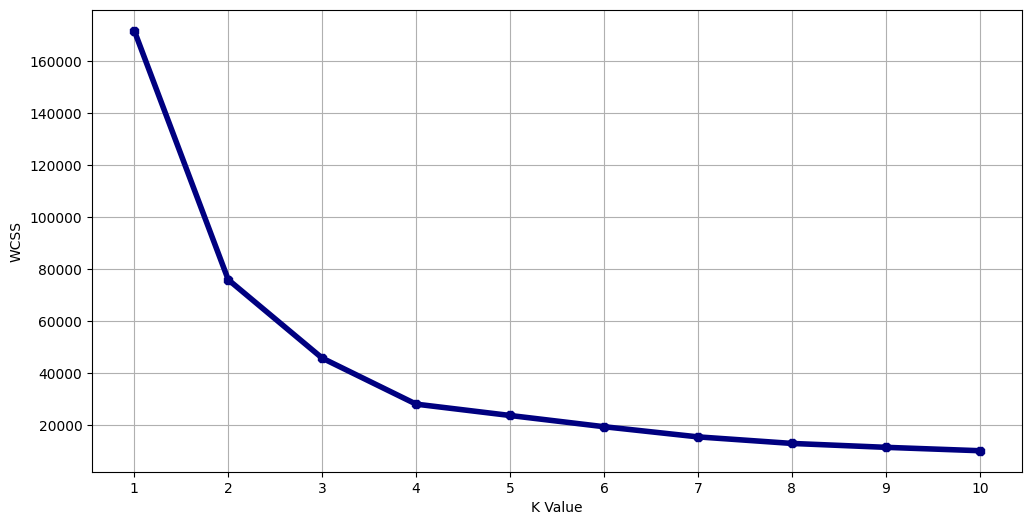

In [ ]:
from sklearn.cluster import KMeans
data = customers[["Age", "Spending Score (1-100)"]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=4, color="navy", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

From the plot, the elbow point touches the number 4. So, we create the K-means with 4 clusters. The `init="k-means++"`is also implemeted to specify the method for initializing the initial cluster centroids. "k-means++" is an unique initialization technique that improves the algorithm's convergence. Also, we put `random_state=0`, the random number generator is seeded with it. The findings are guaranteed to be reproducible by setting it to a precise value (in this case, 0).

Next, we initialize the clusters with `km.fit_predict` which fits the K-means model to the data and assigns each data point to one of the clusters.

This line fits the K-means model (km) to the provided data and assigns each data point to one of the clusters. As a result, cluster labels are contained in an array referred to as clusters. Each member in the array represents a data point and specifies the cluster to which it belongs.
Similar to the first one, we put Cluster Labels to `DataFrame: customers["label"] = clusters` which adds a new column named "label" to the customers DataFrame and populates it with the cluster labels obtained from the K-means clustering. Now, each row in the DataFrame contains information about the customer's features as well as the cluster they belong to, which is stored in the "label" column.

In [ ]:
km = KMeans(n_clusters=4, init="k-means++", random_state=0)
clusters = km.fit_predict(data)

# Assign cluster labels to the "label" column
customers["label"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now, we can set up the figure and subplot. We set the figure size of plot to 14 times 6, we define the adding subplot as 111.
As for the scatters for each clusters, we use `ax.scatter()` , assigning them to colors (e.g., 'red', 'orange', etc.) and marker size `(s=60)`.

After plotting customer data points for each cluster, the code calculates and plots the centroids of these clusters. It iterates through the unique cluster labels using unique_labels, which were obtained from the 'label' column in the DataFrame. For each cluster, it calculates the mean of the `'Age'` and '`Spending Score (1-100)`' for the customers in that cluster. These mean values represent the coordinates of the centroid.` ax.scatter(centroid_x, centroid_y, s=400, c='purple', label=f'Centroid {label}')` is used to plot the centroid as a purple point with a larger marker size`(s=400)` and includes a label indicating the centroid's cluster label.

Then, we set the label x-axis for annual income and y-axis for spending score, and eventually we display them.

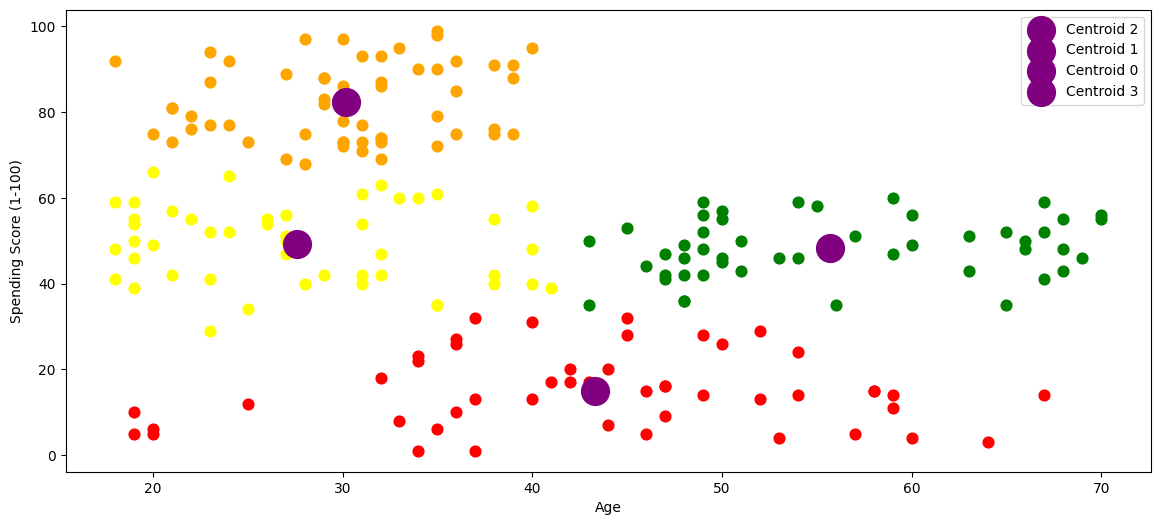

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)

# Scatter plots for each cluster
ax.scatter(customers["Age"][customers.label == 0], customers["Spending Score (1-100)"][customers.label == 0], c='red', s=60)
ax.scatter(customers["Age"][customers.label == 1], customers["Spending Score (1-100)"][customers.label == 1], c='orange', s=60)
ax.scatter(customers["Age"][customers.label == 2], customers["Spending Score (1-100)"][customers.label == 2], c='yellow', s=60)
ax.scatter(customers["Age"][customers.label == 3], customers["Spending Score (1-100)"][customers.label == 3], c='green', s=60)

# Calculate and plot centroids for each cluster
unique_labels = customers['label'].unique()
for label in unique_labels:
    cluster_data = customers[customers['label'] == label]
    centroid_x = cluster_data['Age'].mean()
    centroid_y = cluster_data['Spending Score (1-100)'].mean()
    ax.scatter(centroid_x, centroid_y, s=400, c='purple', label=f'Centroid {label}')

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


Explanation:

Cluster 1 is for customers ages 19 to below 70 whose spending score is below 40.

Cluster 2 is for customers ages 18 to 40 whose spending score is around 70 and above.

Cluster 3 is for customers ages 18 to around 40 whose spending score is around 30 to slightly above 60.

Cluster 4 is for customers ages above 40 to 70 whose spending score is almost touching 40 to slightly above 60.

### Age and Annual income

Just like the first two,we import the KMeans algorithm. Then, we define the data with values from Age and Annual Income since we want to cluster them from annual income and age. Then, we initialize the wcss(Within-Cluster Sum of Squares) for different values of k. Under the wcss, we put an iteration for values of k from 1 to 10. We initialize the k-means thereafter, so for each value of K, a new K-means clustering model (kmeans) is created. We put the `n_clusters=i`, `init="k-means++"`, and `random_state=0`. Next, we fit the k-means model on the data we want to cluster. After fitting the model, the code calculates the WCSS for that specific K. The calculated WCSS value for the current K is appended to the wcss list.

Then, mvoing on to plotting the Elbow curve. We look for the "elbow point" on the displayed Elbow Curve plot.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

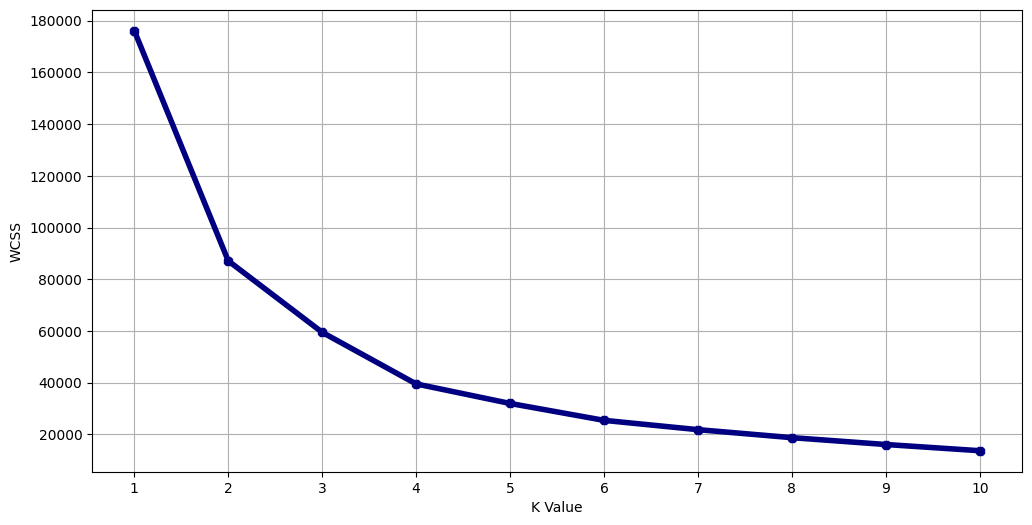

In [ ]:
from sklearn.cluster import KMeans
data = customers[["Age", "Annual Income (k$)"]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=4, color="navy", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

From the plot, the elbow point also touches the number 4. So, we create the K-means with 4 clusters. The `init="k-means++"`is also implemeted, then we put `random_state=0`.

Next, we initialize the clusters with `km.fit_predict` fitting it to the provided data.
Similar to the previous ones, we put Cluster Labels to `DataFrame: customers["label"] = clusters`.

In [ ]:
km = KMeans(n_clusters=4, init="k-means++", random_state=0)
clusters = km.fit_predict(data)

# Assign cluster labels to the "label" column
customers["label"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Finally, we can set up the figure and subplot. We set the figure size of plot to 14 times 6, we define the adding subplot as 111.
As for the scatters for each clusters, we use `ax.scatter()` , assigning them to colors (e.g., 'red', 'orange', etc.) and marker size `(s=60)`.

After plotting customer data points for each cluster. For each cluster, it calculates the mean of the `'Age'` and '`Annual Income (k$)`' for the customers in that cluster. These mean values represent the coordinates of the centroid.` ax.scatter(centroid_x, centroid_y, s=400, c='purple', label=f'Centroid {label}')` is used to plot the centroid as a purple point with a larger marker size`(s=400)` and includes a label indicating the centroid's cluster label.

Then, we set the label x-axis for annual income and y-axis for spending score, and eventually we display them.

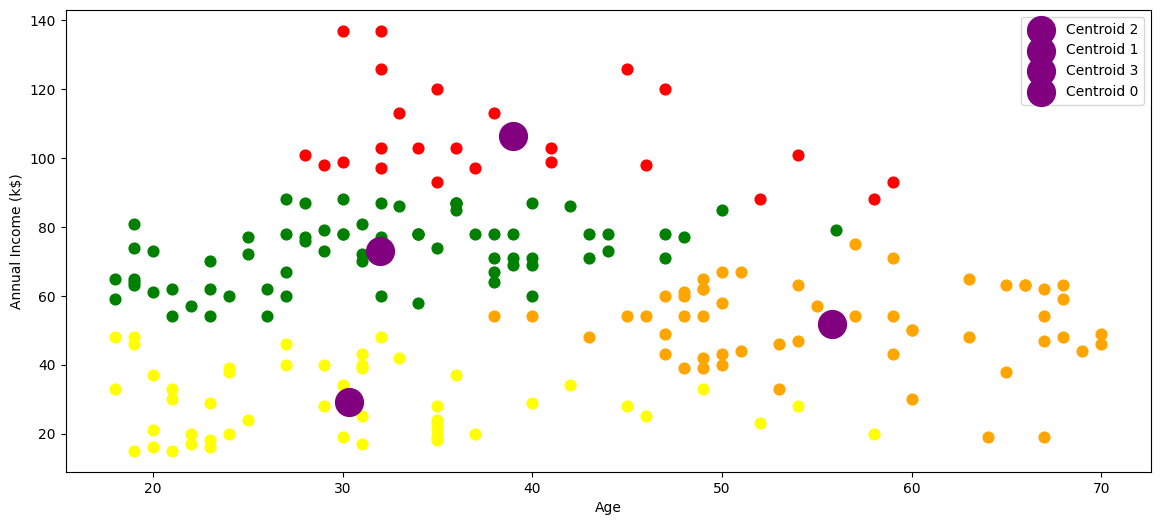

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)

# Scatter plots for each cluster
ax.scatter(customers["Age"][customers.label == 0], customers["Annual Income (k$)"][customers.label == 0], c='red', s=60)
ax.scatter(customers["Age"][customers.label == 1], customers["Annual Income (k$)"][customers.label == 1], c='orange', s=60)
ax.scatter(customers["Age"][customers.label == 2], customers["Annual Income (k$)"][customers.label == 2], c='yellow', s=60)
ax.scatter(customers["Age"][customers.label == 3], customers["Annual Income (k$)"][customers.label == 3], c='green', s=60)

# Calculate and plot centroids for each cluster
unique_labels = customers['label'].unique()
for label in unique_labels:
    cluster_data = customers[customers['label'] == label]
    centroid_x = cluster_data['Age'].mean()
    centroid_y = cluster_data['Annual Income (k$)'].mean()
    ax.scatter(centroid_x, centroid_y, s=400, c='purple', label=f'Centroid {label}')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

Explanation:

Cluster 1 is for customers ages around 30 to slightly touching 60 whose income are around 100k $ and above.

Cluster 2 is for customers ages around 40 to 70 whose income are ranging from 20k$ to around 70k$.

Cluster 3 is for customers ages 18 to below 60 whose income are below 50k $.

Cluster 4 is for customers ages 18 to below 60 whose income are above 50k $ to around 90k $.